In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read csv file to Data Frame
nyc_data = pd.read_csv("Data/nyc_culled_data.csv")
nyc_data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,935,1,CHELSEA,21 OFFICE BUILDINGS,4,801,24,,O3,119 WEST 25TH STREET,...,0,13,13,9875,113062,1906,4,O3,150000000,42720
1,954,1,CHELSEA,25 LUXURY HOTELS,4,801,71,,H1,152 WEST 26TH STREET,...,0,1,1,9826,122236,2010,4,H1,139725000,42709
2,956,1,CHELSEA,26 OTHER HOTELS,4,772,64,,H3,216-222 WEST 23RD STREET,...,0,10,10,17281,170750,1900,4,H3,92007576,42671
3,2050,1,FASHION,21 OFFICE BUILDINGS,4,784,64,,O6,240 WEST 35TH STREET,...,0,35,35,9875,145372,1924,4,O6,108000000,42724
4,2055,1,FASHION,21 OFFICE BUILDINGS,4,838,12,,O6,53 WEST 36TH STREET,...,0,17,17,5925,64300,1911,4,O6,54000000,42670


In [4]:
#Francis: let's find out the code classification of our Bourough, so we can provided it with a name. Here, we can also see the number of of borough we have

nyc_data["BOROUGH"].value_counts()


1    106
3     40
2     22
4      8
5      4
Name: BOROUGH, dtype: int64

In [5]:
#Francis: now that we know the code of our Borough, let's assign each number to its Borough
nyc_data['BOROUGH'][nyc_data['BOROUGH'] == 1] = 'Manhattan'
nyc_data['BOROUGH'][nyc_data['BOROUGH'] == 2] = 'Bronx'
nyc_data['BOROUGH'][nyc_data['BOROUGH'] == 3] = 'Brooklyn'
nyc_data['BOROUGH'][nyc_data['BOROUGH'] == 4] = 'Queens'
nyc_data['BOROUGH'][nyc_data['BOROUGH'] == 5] = 'Staten Island'
nyc_data.head()

C:\Users\francis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,935,Manhattan,CHELSEA,21 OFFICE BUILDINGS,4,801,24,,O3,119 WEST 25TH STREET,...,0,13,13,9875,113062,1906,4,O3,150000000,42720
1,954,Manhattan,CHELSEA,25 LUXURY HOTELS,4,801,71,,H1,152 WEST 26TH STREET,...,0,1,1,9826,122236,2010,4,H1,139725000,42709
2,956,Manhattan,CHELSEA,26 OTHER HOTELS,4,772,64,,H3,216-222 WEST 23RD STREET,...,0,10,10,17281,170750,1900,4,H3,92007576,42671
3,2050,Manhattan,FASHION,21 OFFICE BUILDINGS,4,784,64,,O6,240 WEST 35TH STREET,...,0,35,35,9875,145372,1924,4,O6,108000000,42724
4,2055,Manhattan,FASHION,21 OFFICE BUILDINGS,4,838,12,,O6,53 WEST 36TH STREET,...,0,17,17,5925,64300,1911,4,O6,54000000,42670


In [6]:
#francis: Let's create a data frame and select the coloumn that we only want to work with. 
nyc_info= nyc_data.loc[:,["BOROUGH","LAND SQUARE FEET","GROSS SQUARE FEET","SALE PRICE","YEAR BUILT","TAX CLASS AT TIME OF SALE"]]
nyc_info.head(11)

,BOROUGH,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT,TAX CLASS AT TIME OF SALE
0,Manhattan,9875,113062,150000000,1906,4
1,Manhattan,9826,122236,139725000,2010,4
2,Manhattan,17281,170750,92007576,1900,4
3,Manhattan,9875,145372,108000000,1924,4
4,Manhattan,5925,64300,54000000,1911,4
5,Manhattan,4937,55473,1161500,1926,4
6,Manhattan,7266,81375,5000000,1907,4
7,Manhattan,6994,79465,220000,1913,4
8,Manhattan,7406,81000,105592700,2007,4
9,Manhattan,7406,177000,128177800,2010,4


In [7]:
#changing Gross square feet and sales to a numeric data set for better calculation later
nyc_info ["GROSS SQUARE FEET"]= pd.to_numeric(nyc_info["GROSS SQUARE FEET"] , errors= "coerce")
nyc_info ["SALE PRICE"]= pd.to_numeric(nyc_info["SALE PRICE"] , errors= "coerce")

In [8]:
#let's create a data frame with properties that has gross square feet in our range
nyc_property= nyc_info[nyc_info["GROSS SQUARE FEET"] >400] 
#nyc_property = nyc_info[nyc_info["SALE PRICE"] < 200000000]
nyc_property.head(16)

,BOROUGH,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT,TAX CLASS AT TIME OF SALE
0,Manhattan,9875,113062,150000000,1906,4
1,Manhattan,9826,122236,139725000,2010,4
2,Manhattan,17281,170750,92007576,1900,4
3,Manhattan,9875,145372,108000000,1924,4
4,Manhattan,5925,64300,54000000,1911,4
5,Manhattan,4937,55473,1161500,1926,4
6,Manhattan,7266,81375,5000000,1907,4
7,Manhattan,6994,79465,220000,1913,4
8,Manhattan,7406,81000,105592700,2007,4
9,Manhattan,7406,177000,128177800,2010,4


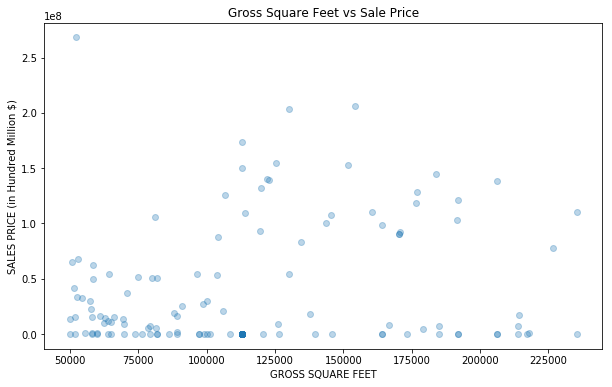

In [9]:
#trying to plot the gross square feet vs the price
# Cy: no limits were set for the first plot in order to see the full dataset
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=nyc_property, fit_reg=False, scatter_kws={'alpha':0.3})

# formatting
plt.title('Gross Square Feet vs Sale Price')
plt.ylabel("SALES PRICE (in Hundred Million $)")
# plt.grid(True)
# plt.ylim(1, 280000000)

# save figure as file
plt.savefig("Data/GrossSQFT_vs_SalesP_All.png")

# show figure
plt.show()

In [10]:
# commented out, we don't need this now
# # Cy: we have outliers, setting limits for Gross Square Feet 0 - 200,000, limits for Sales Price 0 - $200,550,000
# plt.figure(figsize=(10,6))
# sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=nyc_property, fit_reg=False, scatter_kws={'alpha':0.3})

# # formatting
# plt.title('Gross Square Feet vs Sale Price within Range')
# plt.ylim(0, 200550000)
# plt.xlim(0, 200000)
# plt.ylabel("SALES PRICE (in Hundred Million $)")

# # save figure as file
# plt.savefig("Data/GrossSQFT_vs_SalesP_Limits.png")

# # show figure
# plt.show()

In [11]:
#let's plot and see how many properties were sold based based the range of we have set. # "number of properties in each BOROUGH" 
# @CY, Can you create an histogram type of plot?
# only run once if running in notebook, if you have to run again restart kernel, otherwise you add the column multiple times
# Cy: create values of SALE_PRICE / GROSS_SQUARE_FEET to get per sqft value of each property
nyc_property.insert(4, "SQUARE FOOT VALUE ($)", nyc_property["SALE PRICE"]/nyc_property["GROSS SQUARE FEET"], True)  # dtype: int64

# filter data: find only > 49,999 gross sqft, and < $1337 per sqft value
nyc_property_filter = nyc_property[nyc_property["GROSS SQUARE FEET"] >49999]
nyc_property_filter = nyc_property_filter[nyc_property_filter["SQUARE FOOT VALUE ($)"] <1337]
nyc_property_filter["SQUARE FOOT VALUE ($)"]= pd.to_numeric(nyc_property_filter["SQUARE FOOT VALUE ($)"] , errors= "coerce").apply("{:.2f}".format)

# save to csv for future use
nyc_property_filter.to_csv('Data/nyc_properties.csv')

# display data head
nyc_property_filter.head()

,BOROUGH,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SQUARE FOOT VALUE ($),YEAR BUILT,TAX CLASS AT TIME OF SALE
0,Manhattan,9875,113062,150000000,1326.71,1906,4
1,Manhattan,9826,122236,139725000,1143.08,2010,4
2,Manhattan,17281,170750,92007576,538.84,1900,4
3,Manhattan,9875,145372,108000000,742.92,1924,4
4,Manhattan,5925,64300,54000000,839.81,1911,4


In [12]:
# Cy: groupby to create a new data frame for plotting matches
value = nyc_property_filter.groupby('BOROUGH')['SQUARE FOOT VALUE ($)'].count()
nyc_barplot_df = pd.DataFrame({"SITE MATCHES": value})
nyc_barplot_df

,SITE MATCHES
BOROUGH,
Bronx,22
Brooklyn,40
Manhattan,103
Queens,8
Staten Island,4


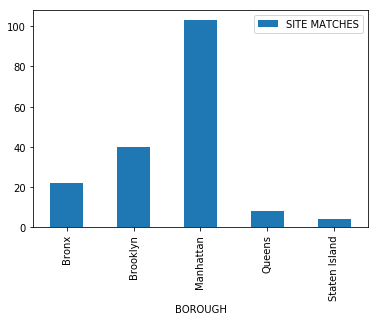

In [13]:
# Cy: plot as bar graph
nyc_barplot_df.plot.bar(x=None, y=None,)

# formatting (needed)

C:\Users\francis\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


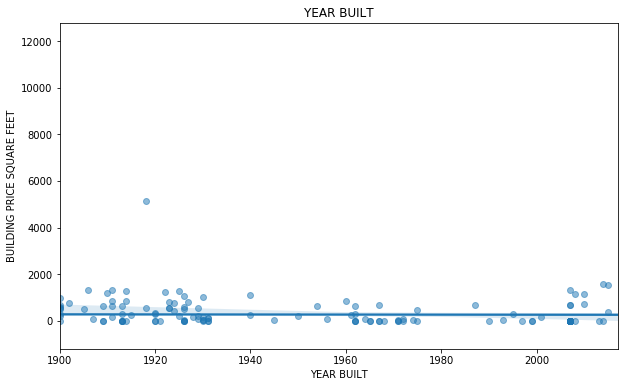

In [14]:
#Looking at the sales prices and the age of building.

nyc_property['BUILDING AGE'] = 2017 - nyc_property['YEAR BUILT']
nyc_property['BUILDING PRICE SQUARE FEET'] = nyc_property['SALE PRICE']/nyc_property['GROSS SQUARE FEET']
plt.figure(figsize=(10,6))
sns.regplot(x='YEAR BUILT', y='BUILDING PRICE SQUARE FEET', data=nyc_property, fit_reg=True, scatter_kws={'alpha':0.5})
plt.title('YEAR BUILT')
#plt.ylim(0, 200000000)
plt.xlim(1900, 2017)
plt.show()

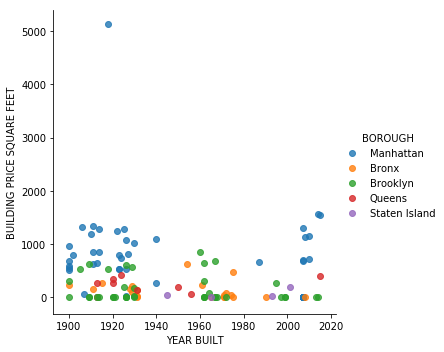

In [15]:
#Looking at building price sold overtime  and the trends.

nyc_test = nyc_property[nyc_property['YEAR BUILT'] >= 1900]
sns.lmplot(x='YEAR BUILT', y='BUILDING PRICE SQUARE FEET', hue="BOROUGH", fit_reg = False, data=nyc_test)

In [16]:
# Cy: working on plots for GROSS SQUARE FEET vs SQUARE FOOT VALUE ($)
# plt.figure(figsize=(10,6))
# sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=nyc_property, fit_reg=False, scatter_kws={'alpha':0.3})

# # formatting
# plt.title('Gross Square Feet vs Sale Price')
# plt.ylabel("SALES PRICE (in Hundred Million $)")
# # plt.grid(True)
# # plt.ylim(1, 280000000)

# # save figure as file
# plt.savefig("Data/GrossSQFT_vs_SalesP_All.png")

# # show figure
# plt.show()